In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings
sns.set()
warnings.filterwarnings("ignore")

In [330]:
dt = pd.read_csv("adult.data", header=None)
col = ['Age', 'Workclass', 'fnlwgt', 'Edu', 'Edu-num', 'Marital-Status', 'Occupation', 'Relation',
       'Race', 'Sex', 'Cap-gain', 'Cap-loss', 'hrsPERweek', 'Native-country', 'Wage']

In [331]:
dt.columns = col

In [332]:
dt

,Age,Workclass,fnlwgt,Edu,Edu-num,Marital-Status,Occupation,Relation,Race,Sex,Cap-gain,Cap-loss,hrsPERweek,Native-country,Wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [333]:
dt.isna().sum()

Age               0
Workclass         0
fnlwgt            0
Edu               0
Edu-num           0
Marital-Status    0
Occupation        0
Relation          0
Race              0
Sex               0
Cap-gain          0
Cap-loss          0
hrsPERweek        0
Native-country    0
Wage              0
dtype: int64

In [334]:
for c in col:
    dt[c] = dt[c].replace(0, np.nan)

In [335]:
dt.isna().sum()

Age                   0
Workclass             0
fnlwgt                0
Edu                   0
Edu-num               0
Marital-Status        0
Occupation            0
Relation              0
Race                  0
Sex                   0
Cap-gain          29849
Cap-loss          31042
hrsPERweek            0
Native-country        0
Wage                  0
dtype: int64

In [336]:
dt.isin([' ?']).sum(axis=0)

Age                  0
Workclass         1836
fnlwgt               0
Edu                  0
Edu-num              0
Marital-Status       0
Occupation        1843
Relation             0
Race                 0
Sex                  0
Cap-gain             0
Cap-loss             0
hrsPERweek           0
Native-country     583
Wage                 0
dtype: int64

In [337]:
# code will replace the special character to nan and then drop the columns 
dt['Native-country'] = dt['Native-country'].replace(' ?',np.nan)
dt['Workclass'] = dt['Workclass'].replace(' ?',np.nan)
dt['Occupation'] = dt['Occupation'].replace(' ?',np.nan)

In [338]:
for c in dt.columns:
    print ("---- %s ---" % c)
    print (dt[c].value_counts())

---- Age ---
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
---- Workclass ---
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
---- fnlwgt ---
203488    13
123011    13
164190    13
148995    12
113364    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: fnlwgt, Length: 21648, dtype: int64
---- Edu ---
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool       

In [339]:
#dropping based on uniquness of data from the dataset 
dt.drop(['Edu-num','Age', 'hrsPERweek', 'fnlwgt', 'Cap-gain','Cap-loss', 'Native-country'], axis=1, inplace=True)

In [340]:
dt['Wage'] = dt['Wage'].map({' <=50K': 0, ' >50K': 1}).astype(int)

In [341]:
dt.shape

(32561, 8)

In [342]:
dt.isna().sum(axis=0)

Workclass         1836
Edu                  0
Marital-Status       0
Occupation        1843
Relation             0
Race                 0
Sex                  0
Wage                 0
dtype: int64

In [343]:
df = dt.dropna(axis=0)
df.shape

(30718, 8)

### Converting categorical data to int type

In [344]:
#gender
df['Sex'] = df['Sex'].map({' Male': 1, ' Female': 0}).astype(int)

In [345]:
# Race
df['Race'] = df['Race'].map({' Black': 0, 
                             ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, ' Amer-Indian-Eskimo': 4}).astype(int)

In [346]:
#marital
df['Marital-Status'] = df['Marital-Status'].map({' Married-spouse-absent': 0, ' Widowed': 1, ' Married-civ-spouse': 2,
                                                 ' Separated': 3, ' Divorced': 4,' Never-married': 5, 
                                                 ' Married-AF-spouse': 6}).astype(int)

In [347]:
#workclass
df['Workclass'] = df['Workclass'].map({' Self-emp-inc': 0, ' State-gov': 1,' Federal-gov': 2, ' Without-pay': 3, 
                                       ' Local-gov': 4,' Private': 5, ' Self-emp-not-inc': 6}).astype(int)

In [348]:
#education
df['Edu'] = df['Edu'].map({' Some-college': 0, ' Preschool': 1, ' 5th-6th': 2, ' HS-grad': 3, ' Masters': 4, ' 12th': 5, 
                           ' 7th-8th': 6, ' Prof-school': 7,' 1st-4th': 8, ' Assoc-acdm': 9, ' Doctorate': 10, 
                           ' 11th': 11, ' Bachelors': 12, ' 10th': 13,' Assoc-voc': 14, ' 9th': 15}).astype(int)

In [349]:
#occupation
df['Occupation'] = df['Occupation'].map({' Farming-fishing': 1, ' Tech-support': 2, ' Adm-clerical': 3, 
                                         ' Handlers-cleaners': 4, 
                                         ' Prof-specialty': 5, ' Machine-op-inspct': 6, ' Exec-managerial': 7,
                                         ' Priv-house-serv': 8,
                                         ' Craft-repair': 9,' Sales': 10, ' Transport-moving': 11, 
                                         ' Armed-Forces': 12, ' Other-service': 13, ' Protective-serv':14}).astype(int)

In [350]:
#relationship
df['Relation'] = df['Relation'].map({' Not-in-family': 0, ' Wife': 1, ' Other-relative': 2,
                                             ' Unmarried': 3,' Husband': 4,' Own-child': 5}).astype(int)

In [351]:
# final dataset
df.tail()

,Workclass,Edu,Marital-Status,Occupation,Relation,Race,Sex,Wage
32556,5,9,2,2,1,3,0,0
32557,5,3,2,6,4,3,1,1
32558,5,3,1,3,3,3,0,0
32559,5,3,5,3,5,3,1,0
32560,0,3,2,7,1,3,0,1


### Data Visualise

In [352]:
X = df.drop(columns=['Wage'])
y = df['Wage']

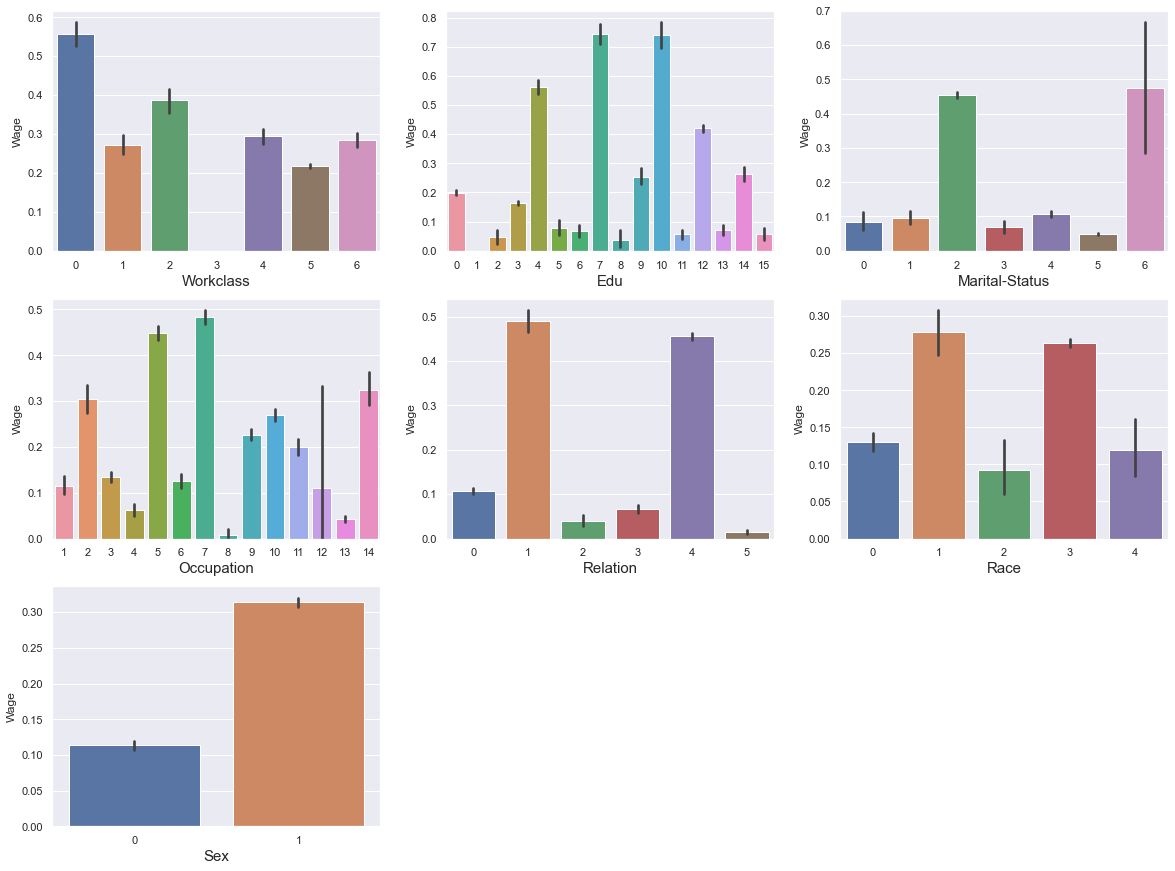

In [353]:
plt.figure(figsize=(20,15))
n = 1

for col in X:
    if n <= 12:
        ax = plt.subplot(3, 3, n)
        sns.barplot(x=X[col], y=y)
        plt.xlabel(col, fontsize=15)
    n += 1
plt.show()

<AxesSubplot:>

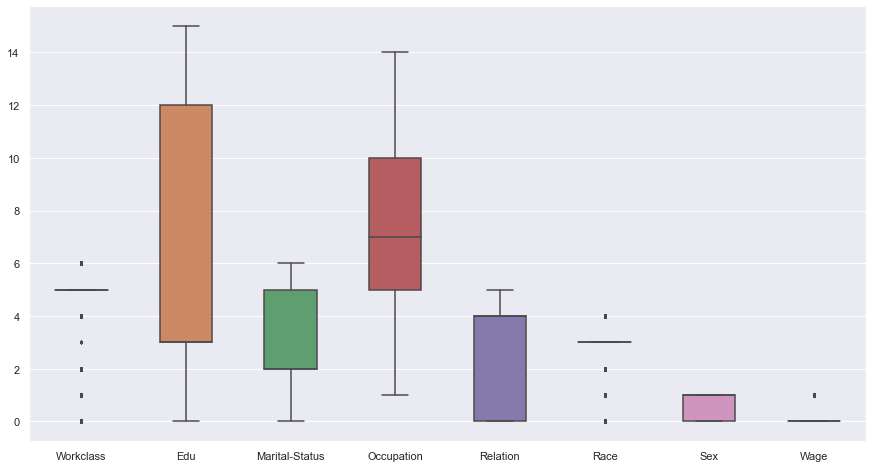

In [354]:
# outlier detection
fig, ax =plt.subplots(figsize=(15, 8))
sns.boxplot(data=df, width=0.5, ax=ax, fliersize=2)

In [355]:
# check for VIFs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [356]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns
vif

,VIF,Features
0,1.005776,Workclass
1,1.006549,Edu
2,1.138905,Marital-Status
3,1.012113,Occupation
4,1.162668,Relation
5,1.016941,Race
6,1.169421,Sex


### Prediction

In [357]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=2021)

In [358]:
xgmodel = XGBClassifier(objective='binary:logistic', use_label_encoder=True, n_estimators=70, max_depth=4)

In [359]:
xgmodel.fit(x_train, y_train, eval_metric='logloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=70, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [360]:
xgmodel.score(x_test, y_test)

0.8278645833333333

In [361]:
y_pred = xgmodel.predict(x_test)

In [362]:
acc = accuracy_score(y_test, y_pred)
acc

0.8278645833333333

In [363]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      5685
           1       0.72      0.55      0.62      1995

    accuracy                           0.83      7680
   macro avg       0.79      0.74      0.76      7680
weighted avg       0.82      0.83      0.82      7680



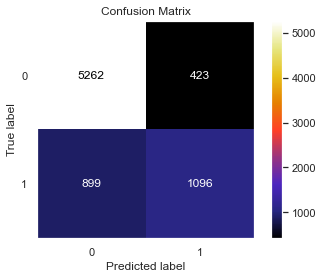

In [364]:
plot_confusion_matrix(xgmodel, x_test, y_test, cmap='CMRmap')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [365]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7374835505650671

In [366]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

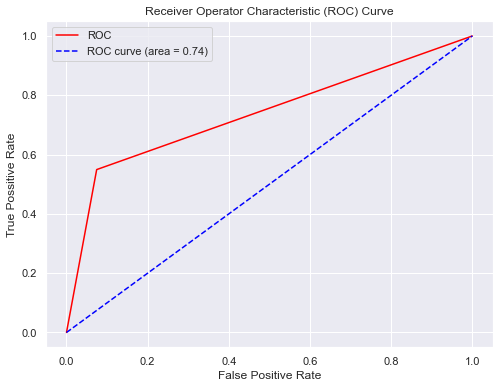

In [367]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="red", label="ROC")
plt.plot([0, 1], [ 0, 1], color='blue', linestyle="--", label="ROC curve (area = %0.2f)" %auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Possitive Rate")
plt.title("Receiver Operator Characteristic (ROC) Curve")
plt.legend()
plt.show()